In [95]:
import pandas as pd

data = pd.read_csv("./RQ4_final_data_full_fine_tuning_5epochs_final1.csv", index_col = 0)

data.columns

Index(['dataset', 'backbone', 'loss_function', 'PairwiseDistance_Mean',
       'PairwiseDistance_Median', 'PairwiseDistance_25%',
       'PairwiseDistance_75%', 'PairwiseDistance_Std', 'std_dev_25%',
       'std_dev_Mean', 'std_dev_Median', 'std_dev_75%', 'std_dev_Std',
       'mean_abs_change_25%', 'mean_abs_change_Mean', 'mean_abs_change_Median',
       'mean_abs_change_75%', 'mean_abs_change_Std'],
      dtype='object')

In [96]:
# Define the backbone and loss groupings
group_backbones = {
    "convnext": ['convnext_tiny', 'robust_convnext_tiny', 'convnext_tiny.fb_in22k',
                 'convnext_base', 'convnext_base.fb_in22k', 'robust_convnext_base',
                 'convnext_base.clip_laion2b', 'convnext_base.clip_laion2b_augreg'],

    "vit": ['deit_small_patch16_224.fb_in1k', 'robust_deit_small_patch16_224',
            'vit_base_patch16_224.augreg_in1k', 'vit_base_patch16_224.augreg_in21k',
            'vit_base_patch16_224.dino', 'vit_base_patch16_224.mae', 'vit_base_patch16_224.orig_in21k',
            'vit_base_patch16_224.sam_in1k', 'vit_base_patch16_224_miil.in21k']
}

# Generate regex patterns for backbones
convnext_pattern = "|".join(group_backbones['convnext'])
vit_pattern = "|".join(group_backbones['vit'])

# Define combined groups
convnext_trades_group = data[
    data['backbone'].str.contains(convnext_pattern, case=False, na=False) &
    data['loss_function'].str.contains('TRADES_v2', case=False, na=False)
]

convnext_classic_group = data[
    data['backbone'].str.contains(convnext_pattern, case=False, na=False) &
    data['loss_function'].str.contains('CLASSIC_AT', case=False, na=False)
]

vit_trades_group = data[
    data['backbone'].str.contains(vit_pattern, case=False, na=False) &
    data['loss_function'].str.contains('TRADES_v2', case=False, na=False)
]

vit_classic_group = data[
    data['backbone'].str.contains(vit_pattern, case=False, na=False) &
    data['loss_function'].str.contains('CLASSIC_AT', case=False, na=False)
]

# Target variables for statistics
target_variables = [
    'PairwiseDistance_Mean',
       'PairwiseDistance_Median', 'PairwiseDistance_25%',
       'PairwiseDistance_75%', 'PairwiseDistance_Std', 'std_dev_25%',
       'std_dev_Mean', 'std_dev_Median', 'std_dev_75%', 'std_dev_Std',
       'mean_abs_change_25%', 'mean_abs_change_Mean', 'mean_abs_change_Median',
       'mean_abs_change_75%', 'mean_abs_change_Std'
]

# Function to compute statistics for a group
def compute_stats(group, group_name):
    stats = group[target_variables].describe().transpose()
    stats['Group'] = group_name
    return stats

# Compute statistics for each group
convnext_trades_stats = compute_stats(convnext_trades_group, 'ConvNeXt X TRADES')
convnext_classic_stats = compute_stats(convnext_classic_group, 'ConvNeXt X Classic')
vit_trades_stats = compute_stats(vit_trades_group, 'ViT/DeiT X TRADES')
vit_classic_stats = compute_stats(vit_classic_group, 'ViT/DeiT X Classic')

# Combine results for easier comparison
group_statistics = pd.concat([
    convnext_trades_stats, convnext_classic_stats, vit_trades_stats, vit_classic_stats
])

# Display the statistics to the user
group_statistics

,count,mean,std,min,25%,50%,75%,max,Group
PairwiseDistance_Mean,47.0,3.584619,2.183035,0.662918,1.960319,3.220743,4.445771,11.174497,ConvNeXt X TRADES
PairwiseDistance_Median,47.0,1.782765,1.297068,0.330484,0.935822,1.306072,2.260350,6.297128,ConvNeXt X TRADES
PairwiseDistance_25%,47.0,0.704442,0.436001,0.074982,0.416165,0.580075,0.954682,1.901404,ConvNeXt X TRADES
PairwiseDistance_75%,47.0,4.590518,3.644372,1.020068,2.367509,3.776716,5.118549,22.696407,ConvNeXt X TRADES
PairwiseDistance_Std,47.0,4.626749,3.045150,0.529858,2.059909,4.247059,6.050662,13.309760,ConvNeXt X TRADES
std_dev_25%,47.0,0.706273,0.385705,0.063135,0.435236,0.646878,0.986552,1.751857,ConvNeXt X TRADES
std_dev_Mean,47.0,1.495875,0.670965,0.534740,0.993032,1.347331,1.790392,3.293044,ConvNeXt X TRADES
std_dev_Median,47.0,0.940293,0.545038,0.096429,0.562978,0.767026,1.281534,2.395101,ConvNeXt X TRADES
std_dev_75%,47.0,1.300992,0.704302,0.355857,0.743449,1.154206,1.814137,3.263564,ConvNeXt X TRADES
std_dev_Std,47.0,1.727515,1.152790,0.140154,0.805354,1.536327,2.351369,5.387364,ConvNeXt X TRADES


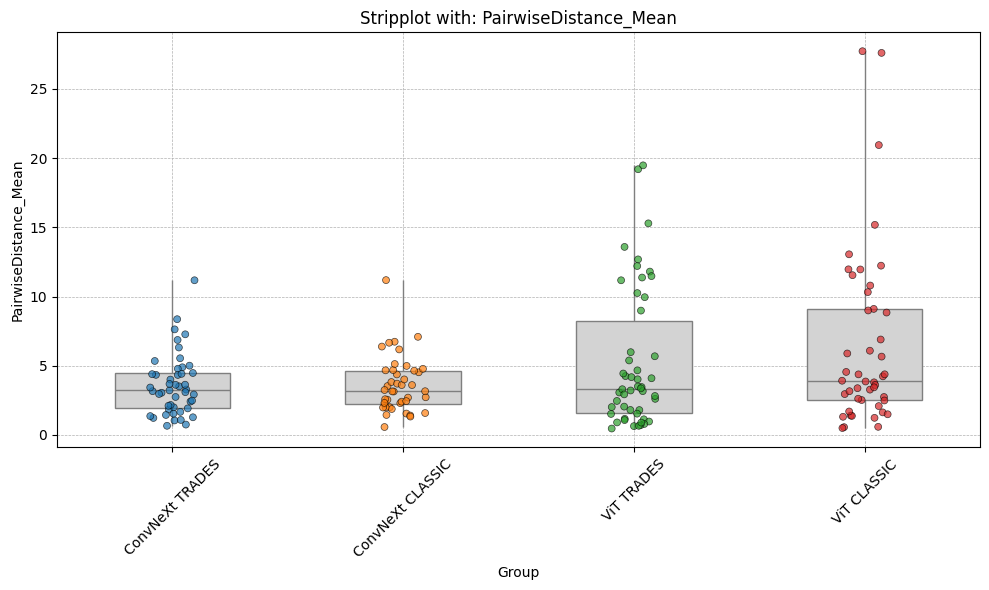

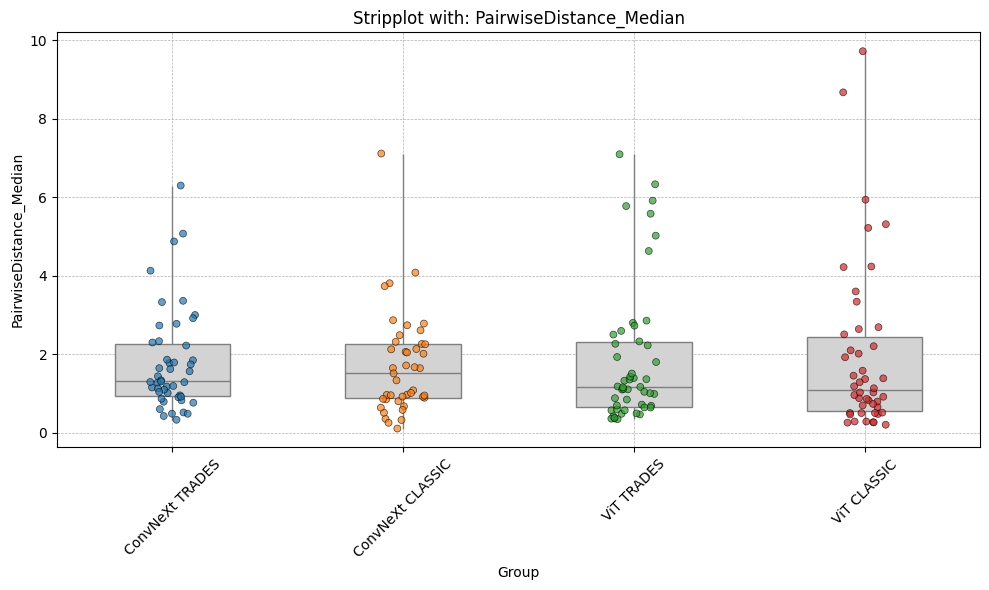

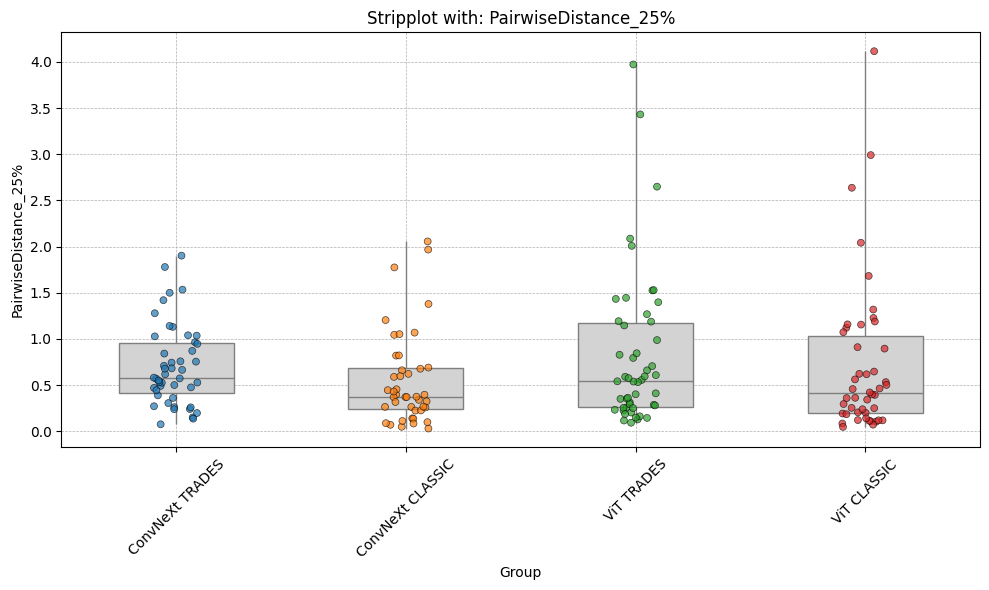

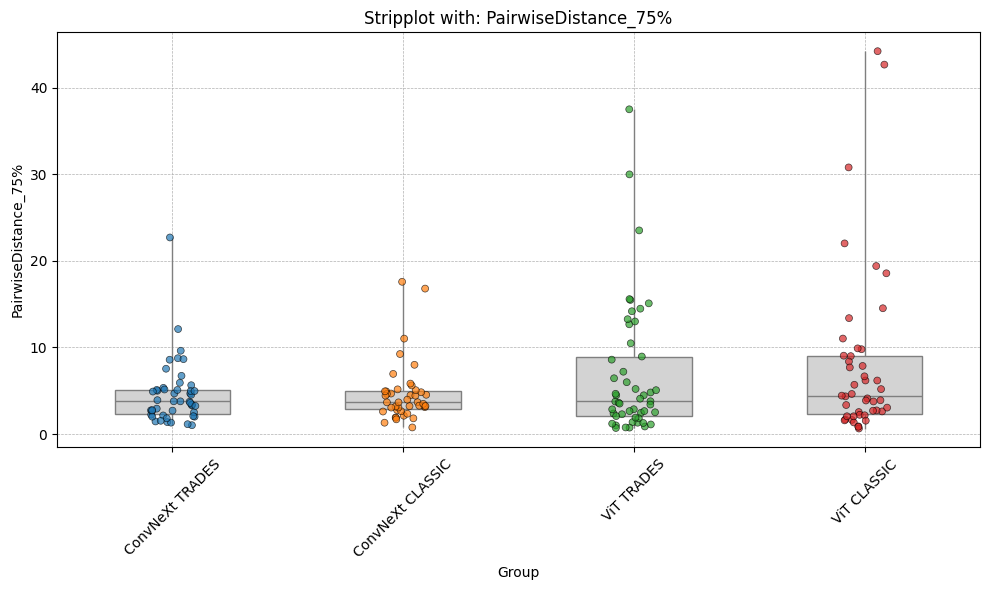

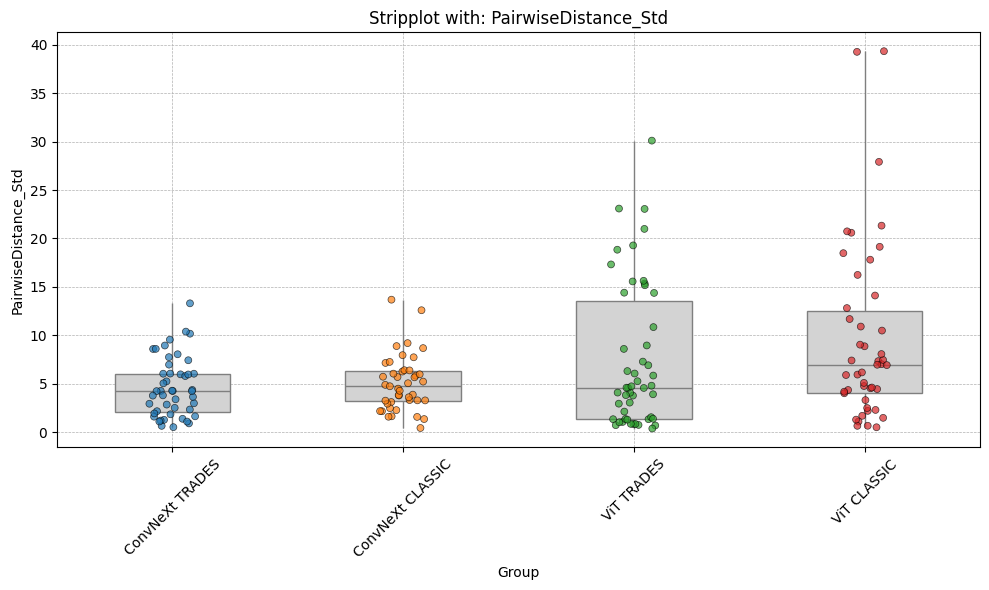

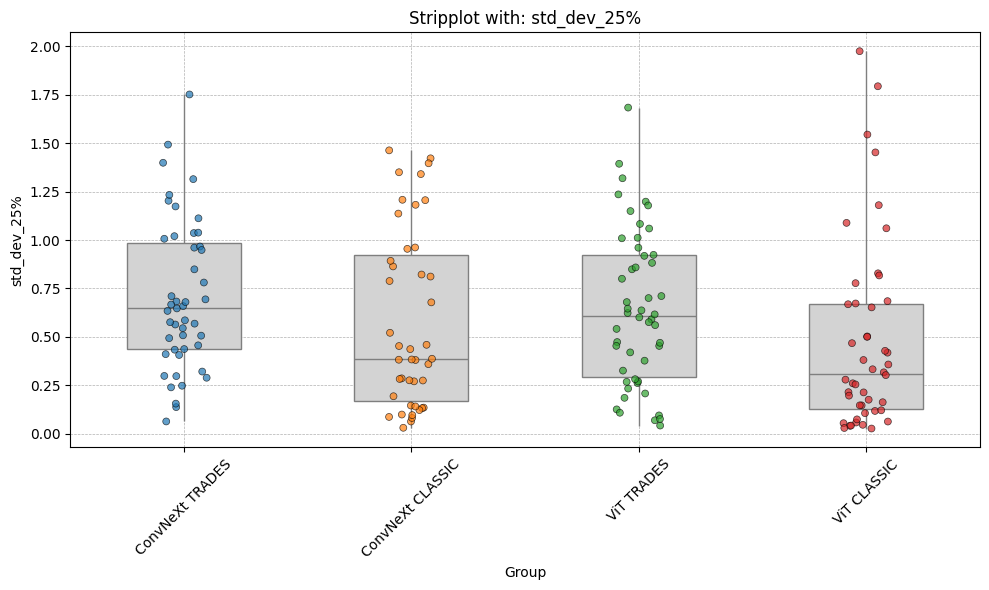

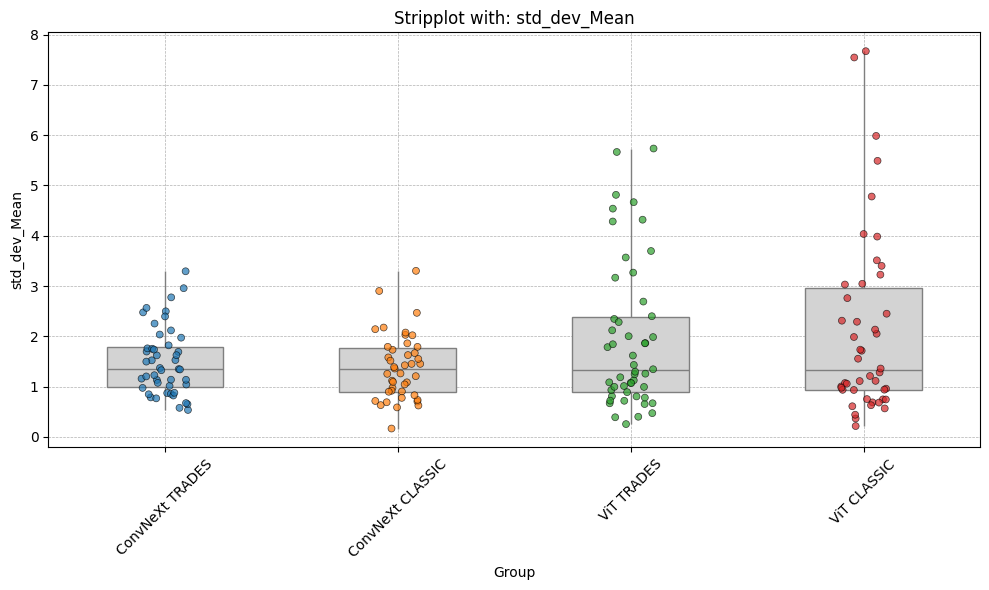

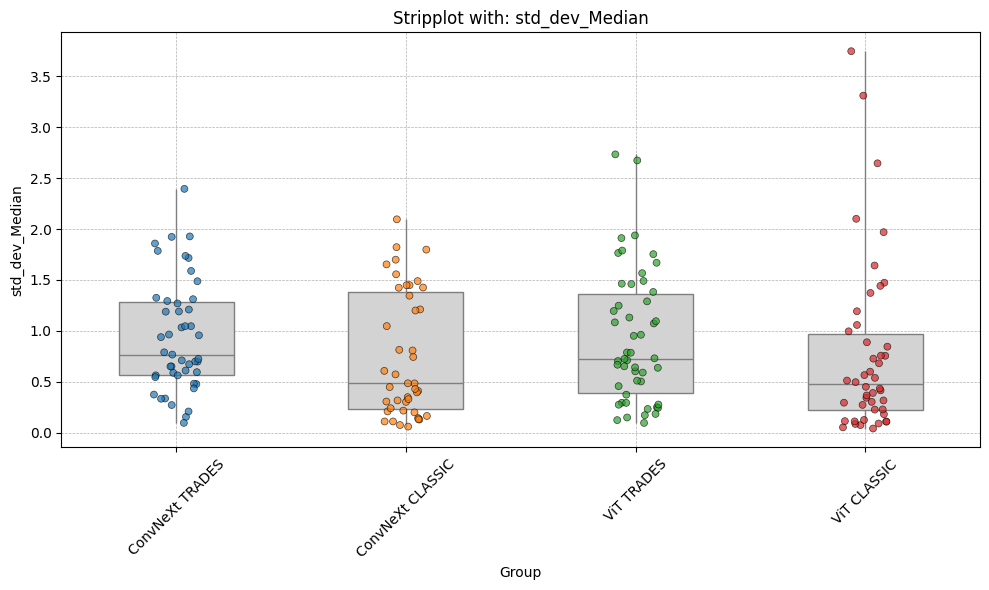

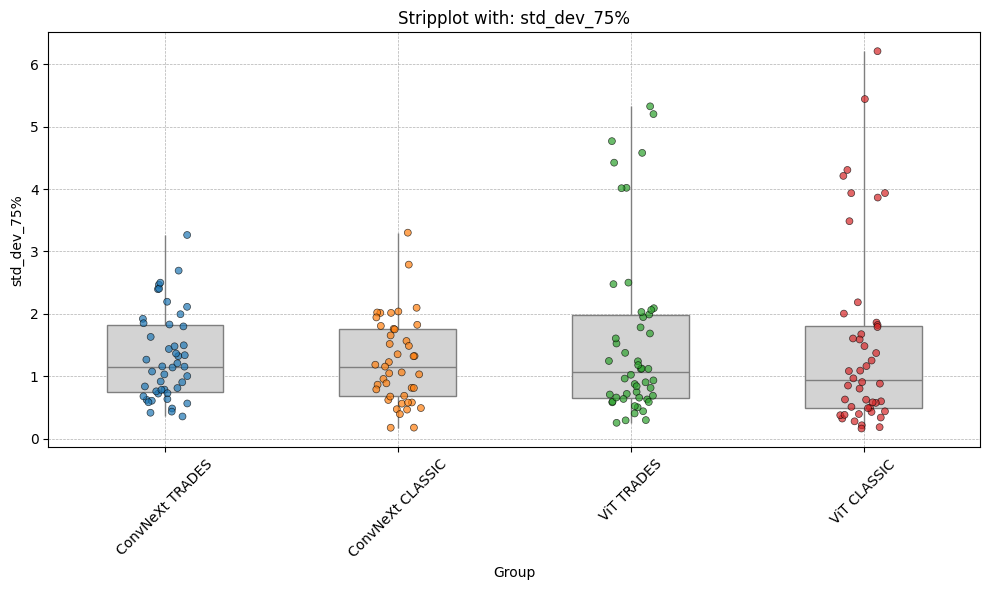

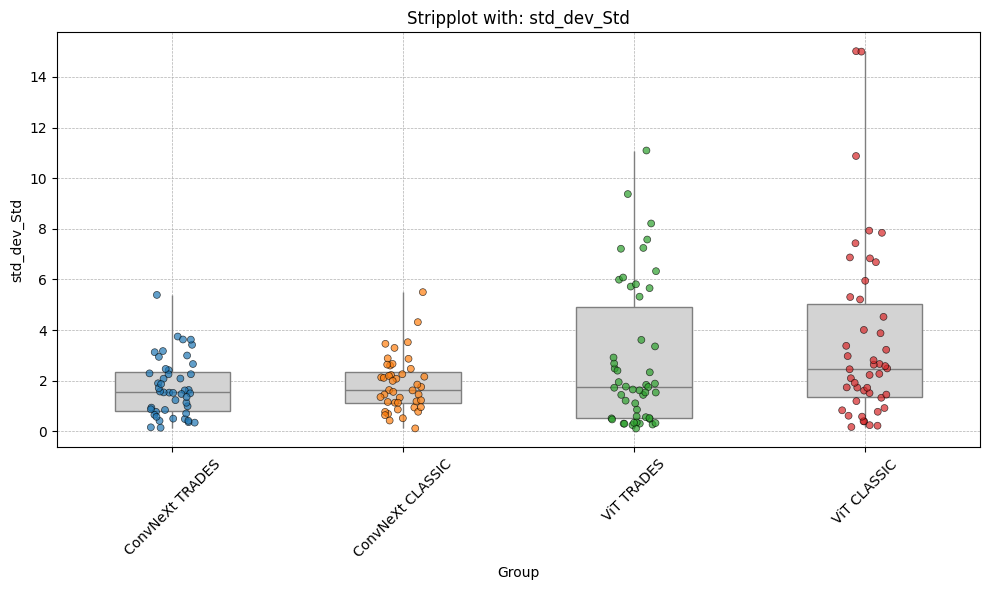

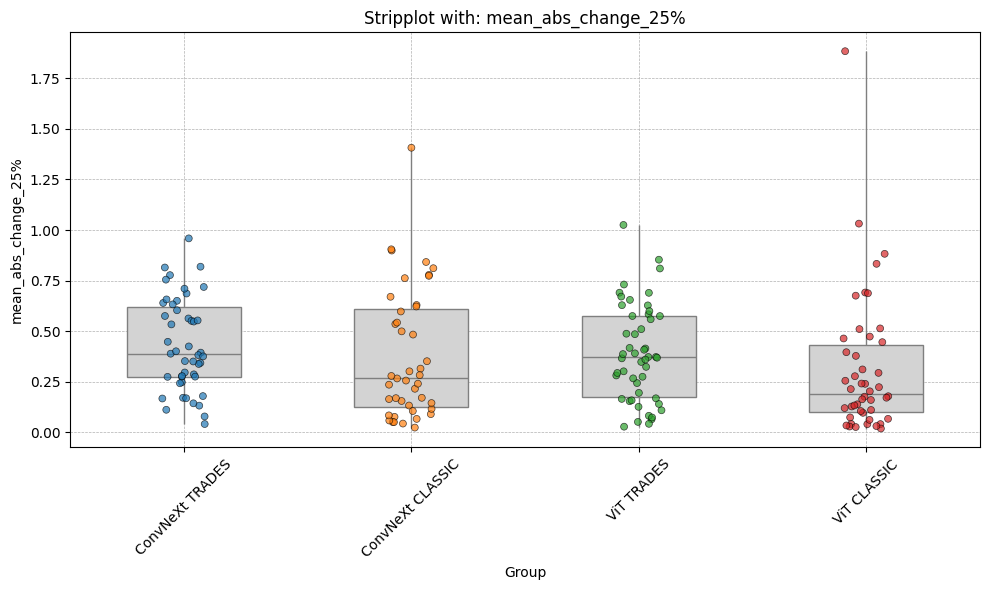

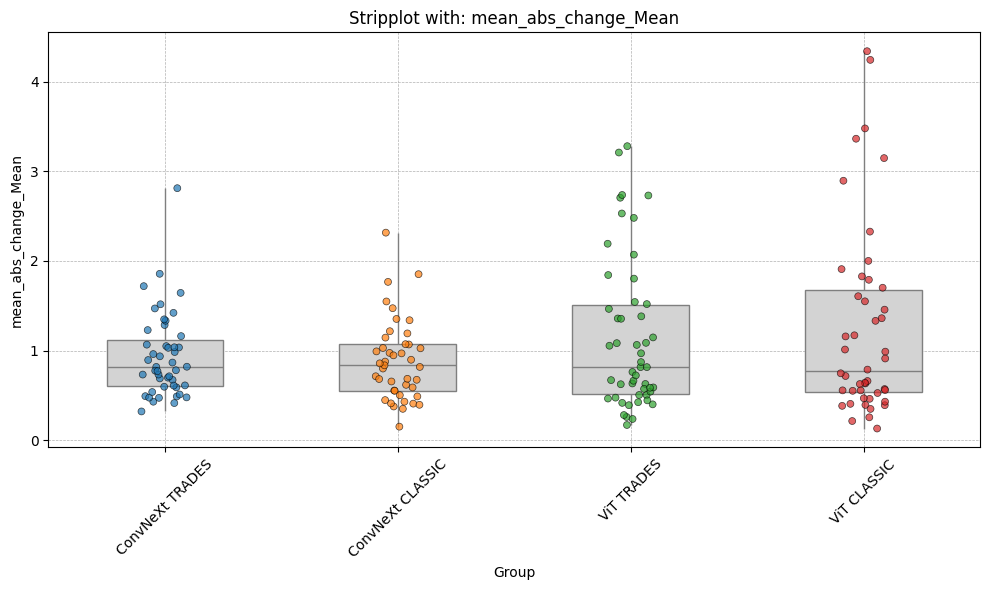

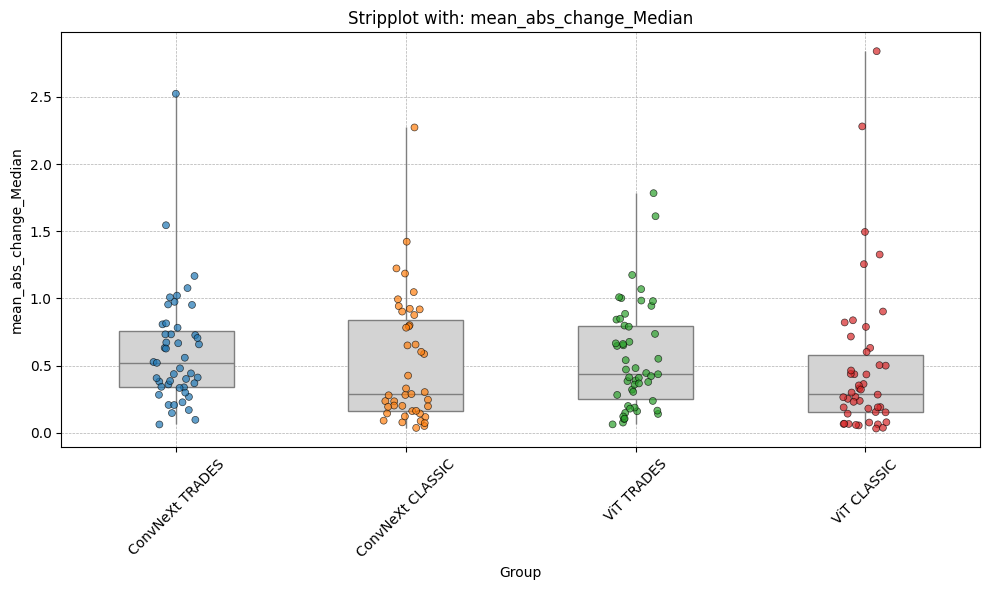

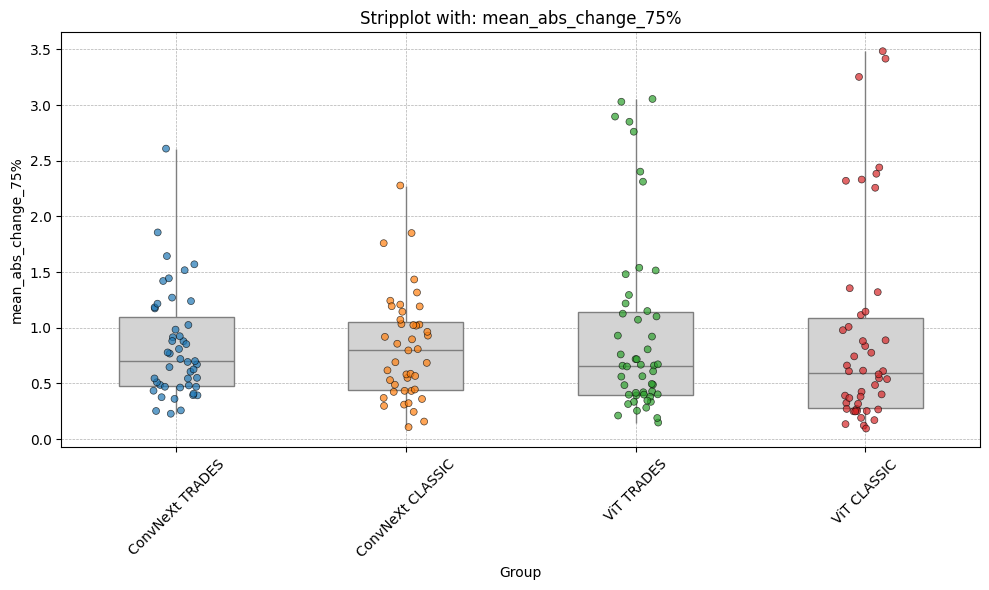

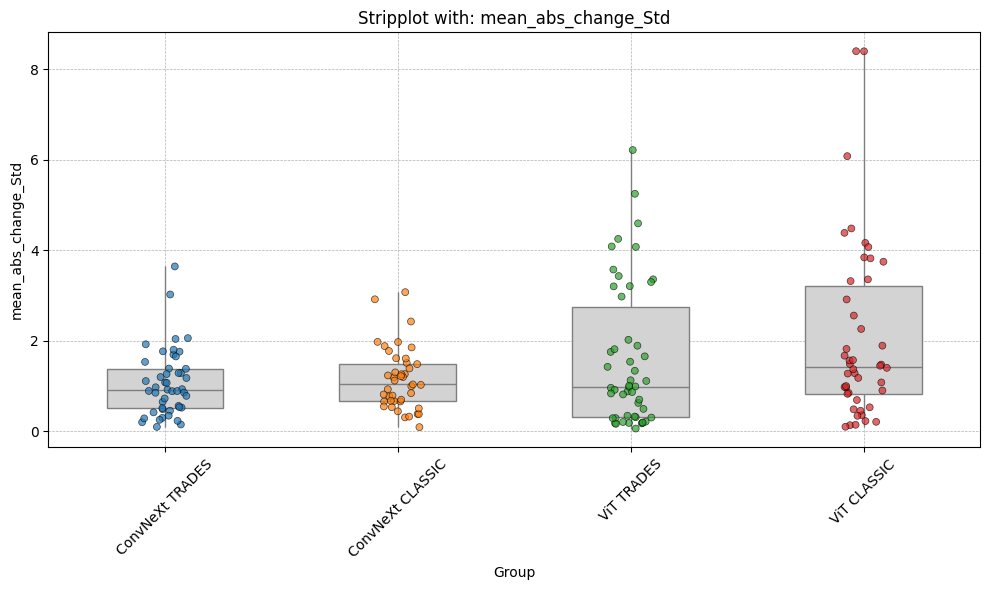

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

group_backbones = {

    "convnext": ['convnext_tiny', 'robust_convnext_tiny', 'convnext_tiny.fb_in22k',
                 'convnext_base', 'convnext_base.fb_in22k', 'robust_convnext_base',
                 'convnext_base.clip_laion2b', 'convnext_base.clip_laion2b_augreg'],

    "vit": ['deit_small_patch16_224.fb_in1k', 'robust_deit_small_patch16_224',
            'vit_base_patch16_224.augreg_in1k', 'vit_base_patch16_224.augreg_in21k',
            'vit_base_patch16_224.dino', 'vit_base_patch16_224.mae', 'vit_base_patch16_224.orig_in21k',
            'vit_base_patch16_224.sam_in1k', 'vit_base_patch16_224_miil.in21k']

}

convnext_pattern = "|".join(group_backbones['convnext'])

vit_pattern = "|".join(group_backbones['vit'])

convnext_trades_group = data[
    data['backbone'].str.contains(convnext_pattern, case=False, na=False) &
    data['loss_function'].str.contains('TRADES_v2', case=False, na=False)
]

convnext_classic_group = data[
    data['backbone'].str.contains(convnext_pattern, case=False, na=False) &
    data['loss_function'].str.contains('CLASSIC_AT', case=False, na=False)
]

vit_trades_group = data[
    data['backbone'].str.contains(vit_pattern, case=False, na=False) &
    data['loss_function'].str.contains('TRADES_v2', case=False, na=False)
]

vit_classic_group = data[
    data['backbone'].str.contains(vit_pattern, case=False, na=False) &
    data['loss_function'].str.contains('CLASSIC_AT', case=False, na=False)
]



# Combine all groups into a single DataFrame

grouped_data = pd.concat([
    convnext_trades_group.assign(group='ConvNeXt TRADES'),
    convnext_classic_group.assign(group='ConvNeXt CLASSIC'),
    vit_trades_group.assign(group='ViT TRADES'),
    vit_classic_group.assign(group='ViT CLASSIC')
])



# Variables to plot
# Target variables for statistics
variables = [
    'PairwiseDistance_Mean',
       'PairwiseDistance_Median', 'PairwiseDistance_25%',
       'PairwiseDistance_75%', 'PairwiseDistance_Std', 'std_dev_25%',
       'std_dev_Mean', 'std_dev_Median', 'std_dev_75%', 'std_dev_Std',
       'mean_abs_change_25%', 'mean_abs_change_Mean', 'mean_abs_change_Median',
       'mean_abs_change_75%', 'mean_abs_change_Std'
]

# Create improved stripplots with visible data points
for variable in variables:
    plt.figure(figsize=(10, 6))
    # Strip plot for individual data points
    sns.stripplot(
        data=grouped_data, x='group', y=variable, hue="group",
        jitter=True, alpha=0.7, size=5, edgecolor='black', linewidth=0.5
    )
    # Overlay boxplot to show quantiles
    sns.boxplot(
        data=grouped_data, x='group', y=variable, 
        whis=[0, 100], fliersize=0, color='lightgray', showcaps=False, width=0.5
    )
    # Logarithmic y-axis
    # plt.yscale('log')
    plt.title(f'Stripplot with: {variable}')
    plt.ylabel(variable)
    plt.xlabel('Group')
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


            

In [ ]:
import os
from ray import train, tune
from ray.tune import ResultGrid
from utils import Setup
from distributed_experiment2 import BaseExperiment
from hydra import initialize, compose
from omegaconf import OmegaConf
from utils import  set_seeds, Hp_opt
import torch
import logging
from ray.tune.logger import Logger
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import numpy as np

logging.getLogger("ray").setLevel(logging.ERROR)

# initialize(config_path="configs", version_base=None)

def result_grid_analysis(result_grid):

    data = []

    for result in result_grid:

        res = {}
        
        if len(result.metrics.keys() ) > 1:

            res['lr1'] = result.config['train_loop_config']['lr1']
            res['lr2'] = result.config['train_loop_config']['lr2']
            res['weight_decay1'] = result.config['train_loop_config']['weight_decay1']
            res['weight_decay2'] = result.config['train_loop_config']['weight_decay2']

            label = f"lr1={res['lr1']:.3f}, lr2={res['lr2']}, weight_decay1={res['weight_decay1']:.3f}, weight_decay2={res['weight_decay2']} "

            loss_list = result.metrics_dataframe.sort_values("training_iteration")["loss"].tolist()
            
            res['loss_list'] = loss_list

            data.append(res)

    max_len = max(len(d['loss_list']) for d in data)

    for d in data:
        d['loss_list'] += [None] * (max_len - len(d['loss_list']))

    for d in data:
        for i, val in enumerate(d['loss_list']):
            d[f'loss_{i}'] = val
        del d['loss_list']

    df = pd.DataFrame(data)
    
    loss_columns = [col for col in df.columns if col.startswith('loss_')]

    non_nan_counts = {"count_"+col: int(df[col].isna().sum())/df.shape[0] for col in loss_columns}

    df['Std_dev'] = df[loss_columns].std(axis=1, skipna=True)
    df['Mean_abs_change'] = df[loss_columns].diff(axis=1).abs().mean(axis=1, skipna=True)

    df[loss_columns] = df[loss_columns].apply(lambda col: col.fillna(col.mean()), axis=0)

    filled_data = df[loss_columns].to_numpy()

    pairwise_distances = pdist(filled_data, metric='euclidean')

    # Initialize stats dictionary
    stats = {}

    # Add pairwise distance statistics
    stats.update({
        "PairwiseDistance_Mean": np.mean(pairwise_distances),
        "PairwiseDistance_Median": np.median(pairwise_distances),
        "PairwiseDistance_25%": np.percentile(pairwise_distances, 25),
        "PairwiseDistance_75%": np.percentile(pairwise_distances, 75),
        "PairwiseDistance_Std": np.std(pairwise_distances),
    })

    # Add quantiles, mean, median, and std for std_dev and mean_abs_change
    for metric in ['Std_dev', 'Mean_abs_change']:
        stats.update({
            f"{metric}_25%": np.percentile(df[metric], 25),
            f"{metric}_Mean": np.mean(df[metric]),
            f"{metric}_Median": np.median(df[metric]),
            f"{metric}_75%": np.percentile(df[metric], 75),
            f"{metric}_Std": np.std(df[metric]),
        })
    
    # Update with counts of zeros
    stats.update(non_nan_counts)

    return df, stats






world_size = torch.cuda.device_count()

#/home/mheuillet/Desktop/robust_training
full_path = os.path.abspath("~/scratch/hpo_results")

project_name = 'full_fine_tuning_5epochs_final1'

datas=( 'dtd',   ) 
# 'imagenette2' 'eurosat' 'stanford_cars', 'caltech101', 'fgvc-aircraft-2013b', 'flowers-102', 'oxford-iiit-pet'

losses=( 'TRADES_v2', 'CLASSIC_AT' ) #  

backbones=( 'convnext_tiny', ) 

#'robust_convnext_tiny', 'convnext_tiny.fb_in22k', 
#   'deit_small_patch16_224.fb_in1k', 'robust_deit_small_patch16_224',
#   'convnext_base', 'convnext_base.fb_in22k', 'robust_convnext_base', 
#   'convnext_base.clip_laion2b', 'convnext_base.clip_laion2b_augreg',
#   'vit_base_patch16_224.augreg_in1k', 'vit_base_patch16_224.augreg_in21k',
#   'vit_base_patch16_224.dino', 'vit_base_patch16_224.mae', 'vit_base_patch16_224.orig_in21k',
#   'vit_base_patch16_224.sam_in1k', 'vit_base_patch16_224_miil.in21k'

config = OmegaConf.load("./configs/default_config.yaml")
config = compose(config_name="default_config")  # Store Hydra config in a variable


import pickle
import numpy as np

final_data = []

for backbone in backbones:
    for loss in losses:
        for dataset in datas:

            statistics = {}
            statistics["dataset"] = dataset
            statistics["backbone"] = backbone
            statistics["loss_function"] = loss

            config.dataset = dataset
            config.backbone = backbone
            config.loss_function = loss
            config.project_name = project_name

            set_seeds(config.seed)
            setup = Setup(config, world_size)
            experiment = BaseExperiment(setup)
            hp_search = Hp_opt(setup)
            trainer = hp_search.get_trainer(experiment.training)
            # /home/mheuillet/Desktop/robust_training
            experiment_path = "~/hpo_results/{}_{}".format(setup.project_name, setup.exp_id)

            # try:

            restored_tuner = tune.Tuner.restore(experiment_path, trainable=trainer)
            result_grid = restored_tuner.get_results()

            df, stats = result_grid_analysis(result_grid)

            statistics.update(stats)
            final_data.append(statistics)
                
                
            # except:
            #     print('hey')
            #     pass


final_data = pd.DataFrame(final_data)
# final_data.to_csv( "~/projects/def-adurand/mheuill/robust_training/RQ4_final_data_{}.csv".format(project_name) )

serialized_values convnext_tiny_dtd_TRADES_v2
1
serialized_values convnext_tiny_dtd_CLASSIC_AT
1


In [92]:
stats

{'PairwiseDistance_Mean': np.float64(1.5464705777692387),
 'PairwiseDistance_Median': np.float64(0.10771238769773454),
 'PairwiseDistance_25%': np.float64(0.04826108871346952),
 'PairwiseDistance_75%': np.float64(2.11481529989913),
 'PairwiseDistance_Std': np.float64(3.290191798201992),
 'Std_dev_25%': np.float64(nan),
 'Std_dev_Mean': np.float64(0.6178628771930648),
 'Std_dev_Median': np.float64(nan),
 'Std_dev_75%': np.float64(nan),
 'Std_dev_Std': np.float64(1.5444585975024896),
 'Mean_abs_change_25%': np.float64(nan),
 'Mean_abs_change_Mean': np.float64(0.5246918531952711),
 'Mean_abs_change_Median': np.float64(nan),
 'Mean_abs_change_75%': np.float64(nan),
 'Mean_abs_change_Std': np.float64(1.4478977796616277),
 'count_loss_0': 0.0,
 'count_loss_1': 0.5333333333333333,
 'count_loss_2': 0.762962962962963,
 'count_loss_3': 0.7703703703703704,
 'count_loss_4': 0.9037037037037037}

In [64]:
filled_data = df[ ['loss_0', 'loss_1', 'loss_2', 'loss_3', 'loss_4' ] ].fillna(0).to_numpy()
pairwise_distances = pdist(filled_data, metric='euclidean')
pairwise_distances

array([ 5.49989764,  0.92735427,  3.25704451, ...,  0.08030097,
       27.66600465, 27.66629865], shape=(9045,))

In [77]:
df

,lr1,lr2,weight_decay1,weight_decay2,loss_0,loss_1,loss_2,loss_3,loss_4,std_dev,mean_abs_change
0,0.001679,0.000035,0.000002,0.000003,4.642973,4.635556,3.900716,3.877232,3.804011,0.427960,0.209740
1,0.000461,0.002929,0.000009,0.000003,4.623799,4.635085,6.020294,5.182116,3.804011,0.817204,0.903194
2,0.003392,0.004731,0.000081,0.000001,4.491872,4.467757,4.791304,4.003130,3.804011,0.399937,0.333738
3,0.012049,0.008451,0.000011,0.000011,4.645187,4.588801,5.194985,6.865712,3.804011,1.144805,1.348750
4,0.041842,0.015271,0.004582,0.000004,4.722219,4.617724,6.020294,5.182116,3.804011,0.812774,0.930837
...,...,...,...,...,...,...,...,...,...,...,...
130,0.000046,0.051290,0.000025,0.001008,4.666237,4.617724,6.020294,5.182116,3.804011,0.815686,0.916841
131,0.063198,0.001685,0.004596,0.000368,4.745446,4.617724,6.020294,5.182116,3.804011,0.811789,0.936643
132,0.009579,0.004753,0.000011,0.000002,4.672171,4.617724,6.020294,5.182116,3.804011,0.815342,0.918325
133,0.043963,0.000293,0.000054,0.000112,4.752472,4.617724,6.020294,5.182116,3.804011,0.811517,0.938400
